In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'D:\water_potability.csv')

In [3]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
data.shape# rows, columns

(3276, 10)

In [5]:
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [8]:
data.duplicated().any()

False

In [9]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [10]:
null_df=data.isnull().sum().reset_index()
null_df.columns=['column','Null_count']
null_df['%miss_value'] = round(null_df['Null_count']/len(data),2)*100
null_df

,column,Null_count,%miss_value
0,ph,491,15.0
1,Hardness,0,0.0
2,Solids,0,0.0
3,Chloramines,0,0.0
4,Sulfate,781,24.0
5,Conductivity,0,0.0
6,Organic_carbon,0,0.0
7,Trihalomethanes,162,5.0
8,Turbidity,0,0.0
9,Potability,0,0.0


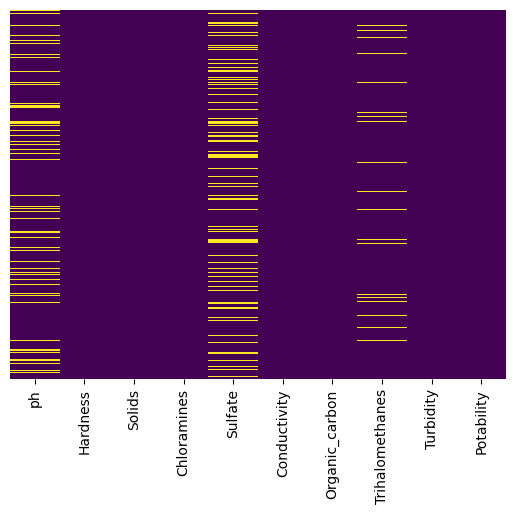

In [11]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

<Axes: ylabel='Frequency'>

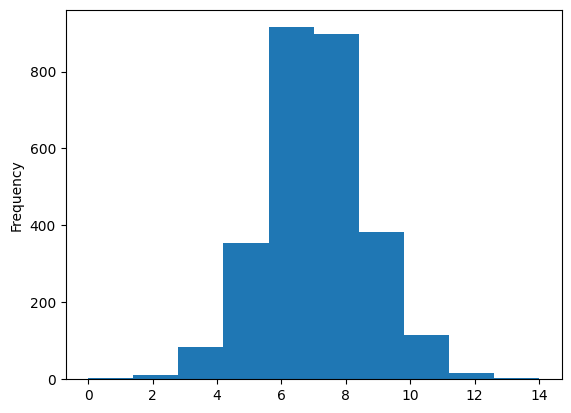

In [12]:
data['ph'].plot(kind = 'hist')

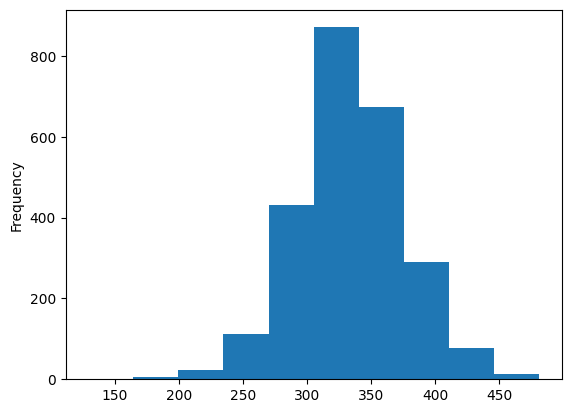

In [13]:
data['Sulfate'].plot(kind = 'hist')
plt.show()

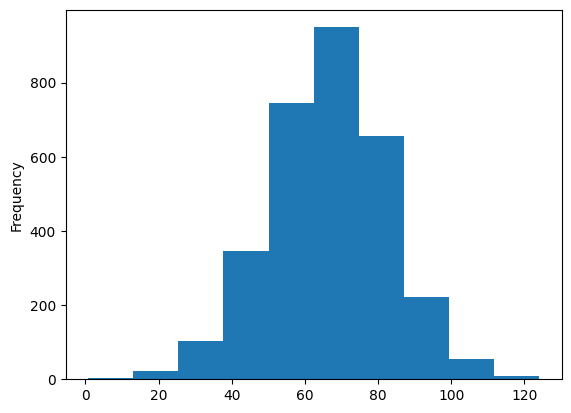

In [14]:
data['Trihalomethanes'].plot(kind = 'hist')
plt.show()

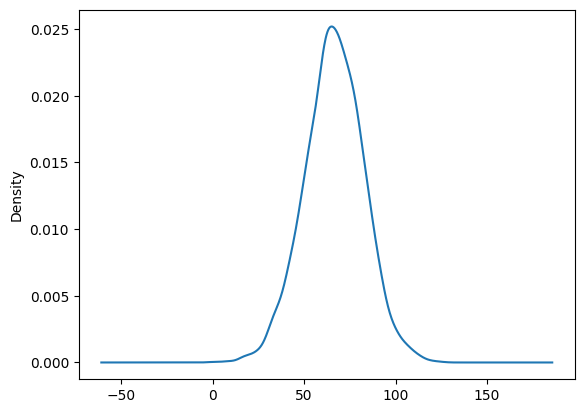

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['Trihalomethanes'].plot(kind = 'kde',ax=ax)
plt.show()

In [16]:
data['ph'] = data['ph'].fillna(data['ph'].mean())
data['Trihalomethanes'] = data['Trihalomethanes'].fillna(data['Trihalomethanes'].mean())
data['Trihalomethanes'] = data['Trihalomethanes'].fillna(data['Sulfate'].mean())
data['Sulfate'] = data['Sulfate'].fillna(data['Sulfate'].mean())

In [17]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### check for correlation

In [18]:
corr_matrix=data.corr()
corr_matrix

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


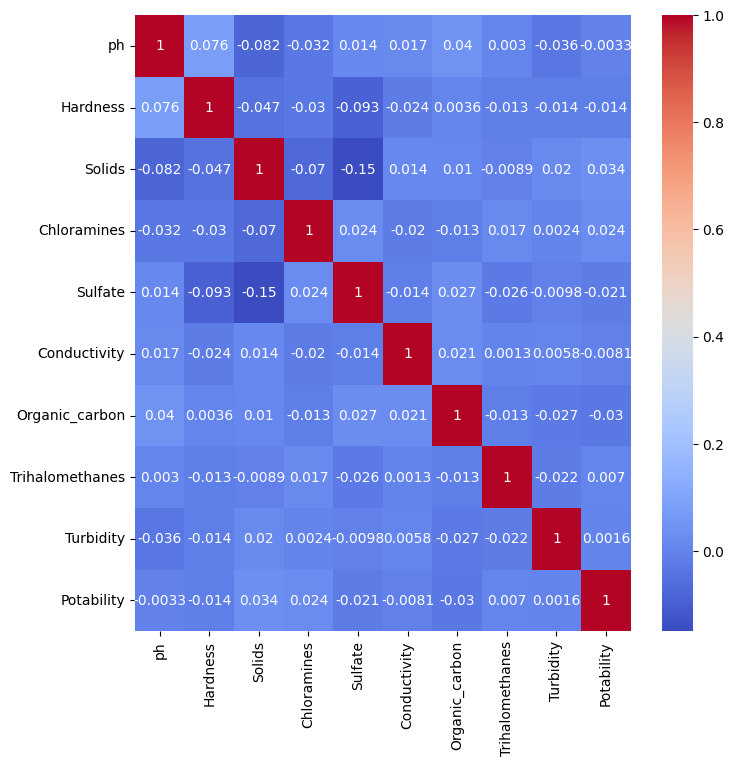

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()

In [20]:
corr_matrix1= corr_matrix.abs()
upper_tri=corr_matrix1.where(np.triu(np.ones(corr_matrix1.shape),k=1).astype(np.bool_))
upper_tri

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,NaN,0.075833,0.081884,0.031811,0.014403,0.017192,0.040061,0.002994,0.036222,0.003287
Hardness,NaN,NaN,0.046899,0.030054,0.092766,0.023915,0.003610,0.012690,0.014449,0.013837
Solids,NaN,NaN,NaN,0.070148,0.149840,0.013831,0.010242,0.008875,0.019546,0.033743
Chloramines,NaN,NaN,NaN,NaN,0.023791,0.020486,0.012653,0.016627,0.002363,0.023779
Sulfate,NaN,NaN,NaN,NaN,NaN,0.014059,0.026909,0.025605,0.009790,0.020619
Conductivity,NaN,NaN,NaN,NaN,NaN,NaN,0.020966,0.001255,0.005798,0.008128
Organic_carbon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012976,0.027308,0.030001
Trihalomethanes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021502,0.006960
Turbidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001581
Potability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

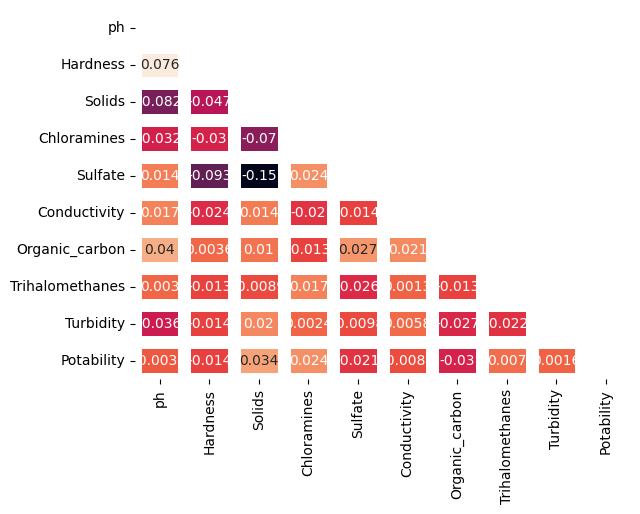

In [21]:
matrix=np.triu(corr_matrix)
sns.heatmap(data.corr(),annot=True,linewidth=8,mask=matrix,cmap="rocket",cbar=False)

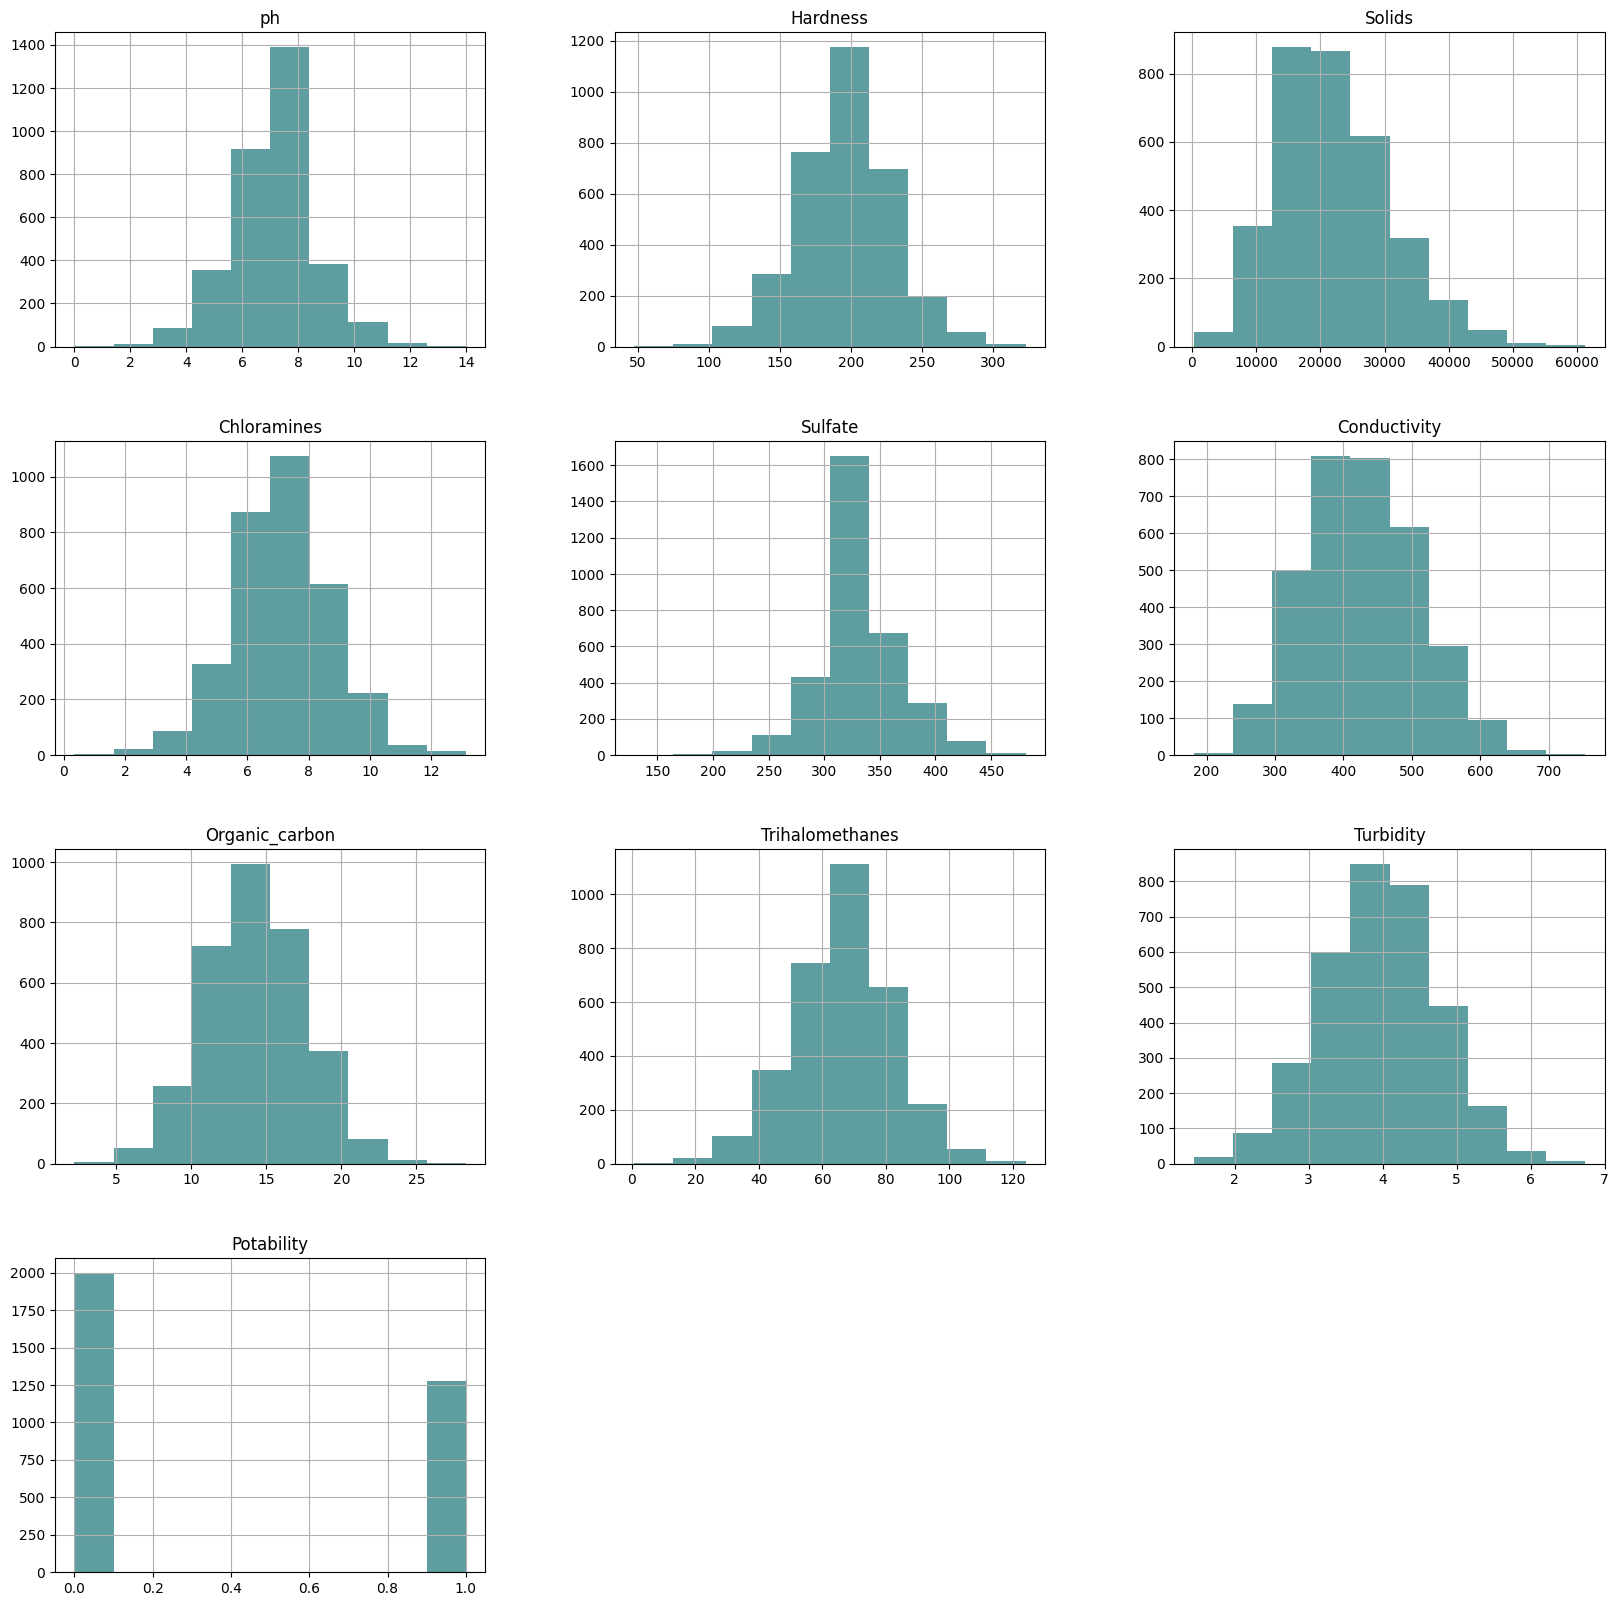

In [22]:
data_hist_plot= data.hist(figsize=(20,20),color="#5F9EA0")

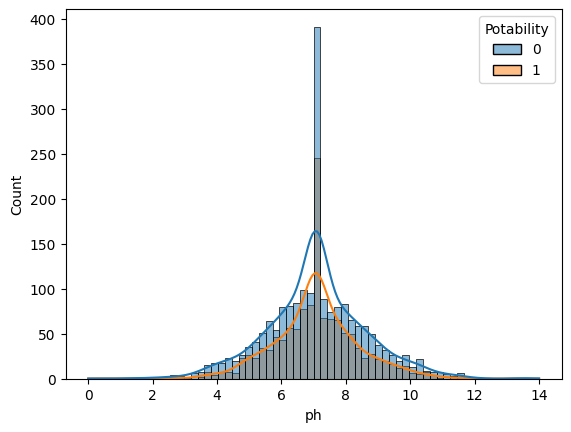

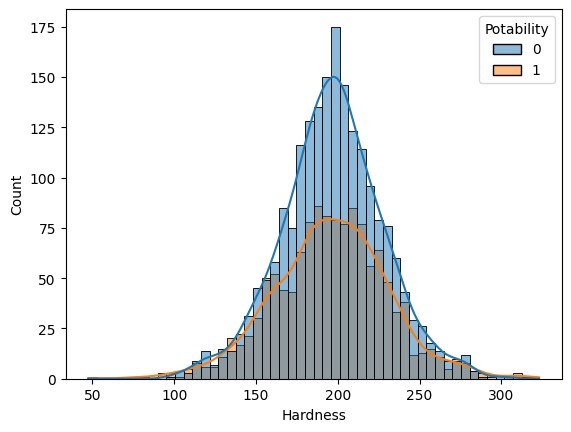

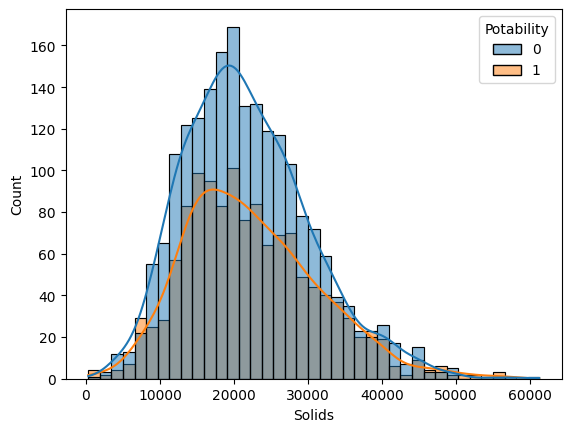

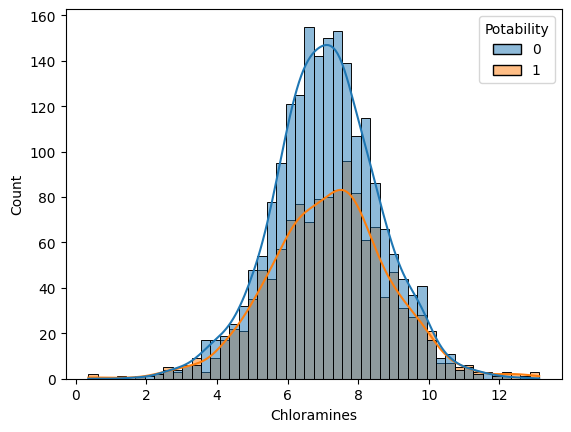

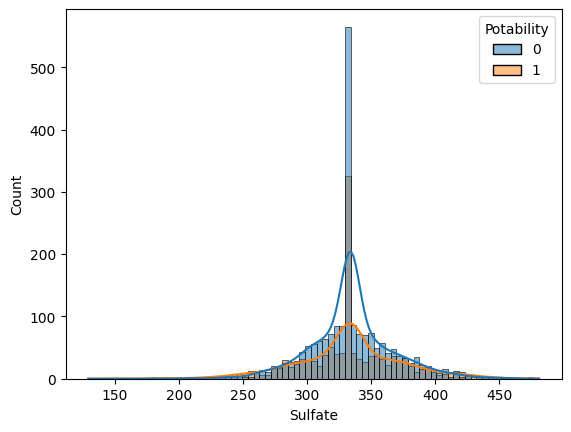

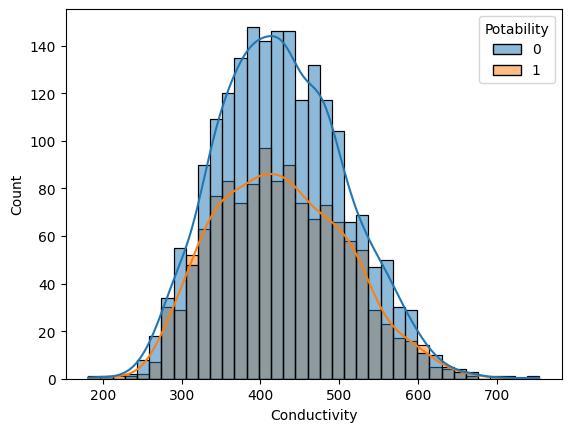

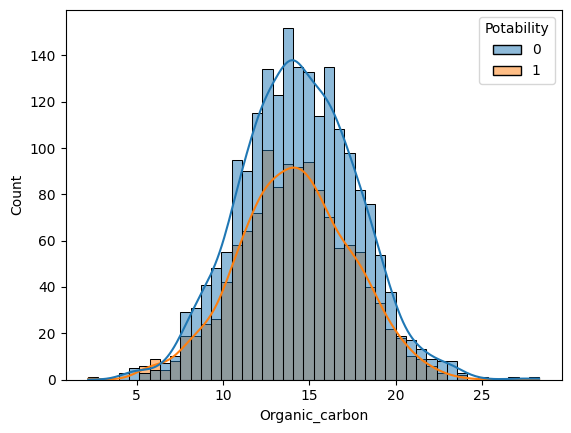

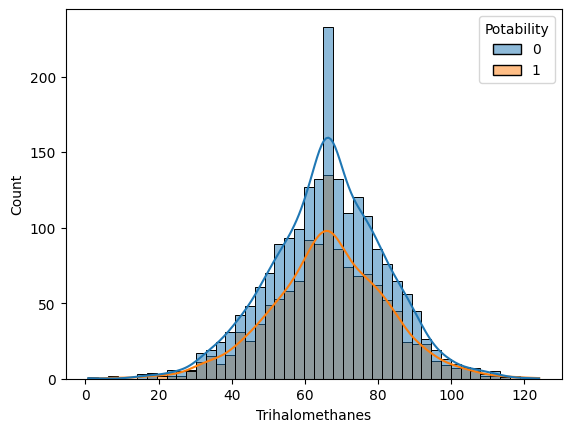

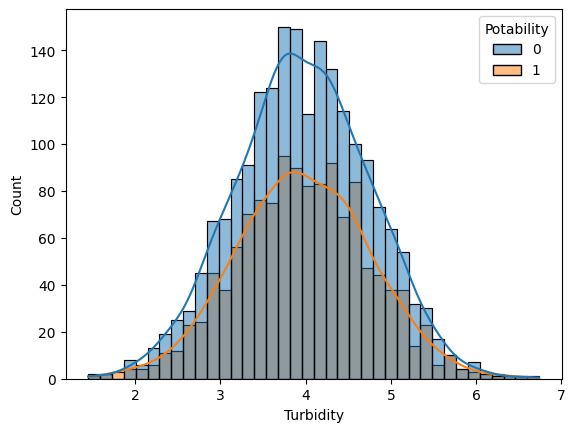

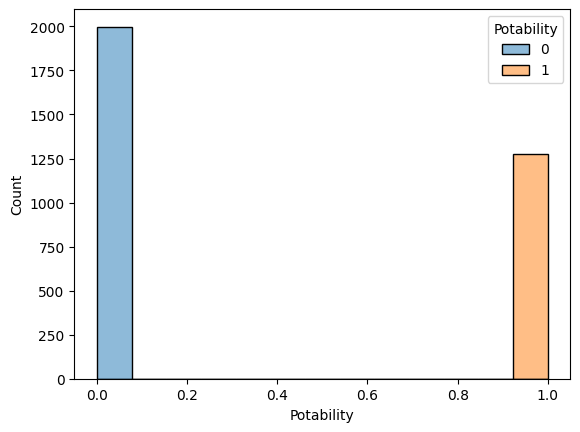

In [23]:
for col in data.columns:
    sns.histplot(data=data,x=col,kde=True,hue='Potability')
    plt.show()

In [24]:
data.groupby('Potability').mean().T

Potability,0,1
ph,7.084658,7.074754
Hardness,196.733292,195.800744
Solids,21777.490788,22383.991018
Chloramines,7.092175,7.169338
Sulfate,334.371700,332.844122
Conductivity,426.730454,425.383800
Organic_carbon,14.364335,14.160893
Trihalomethanes,66.308522,66.533513
Turbidity,3.965800,3.968328


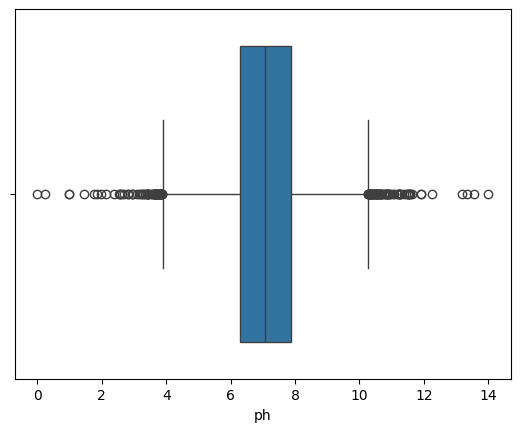

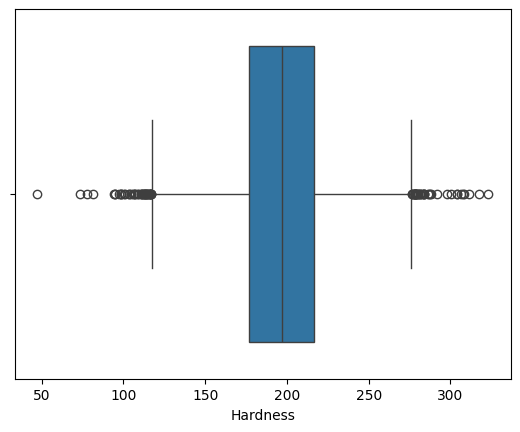

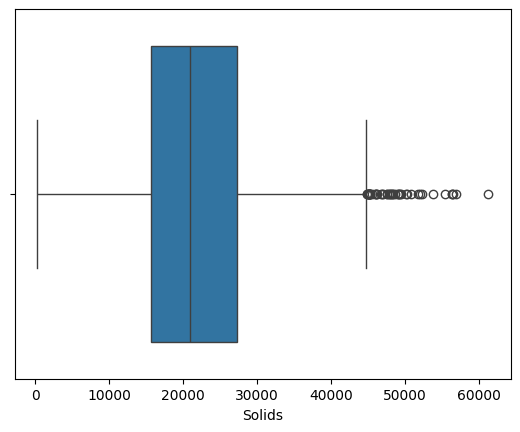

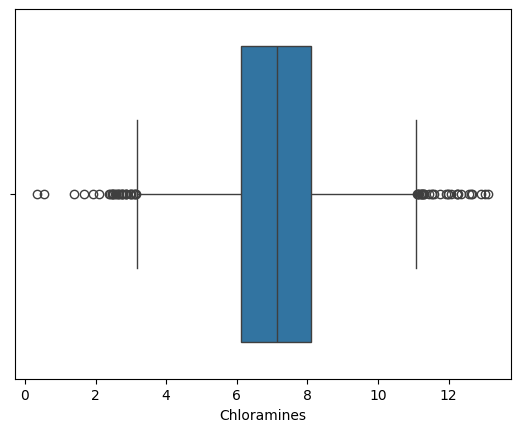

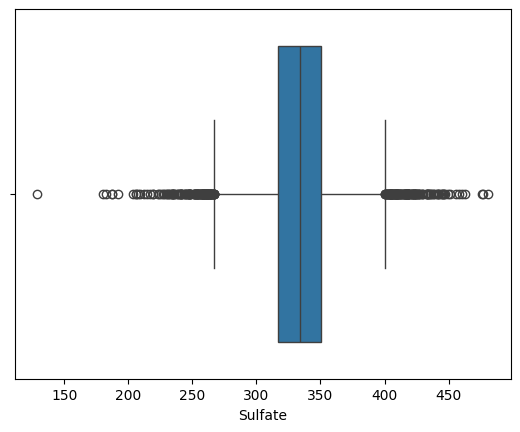

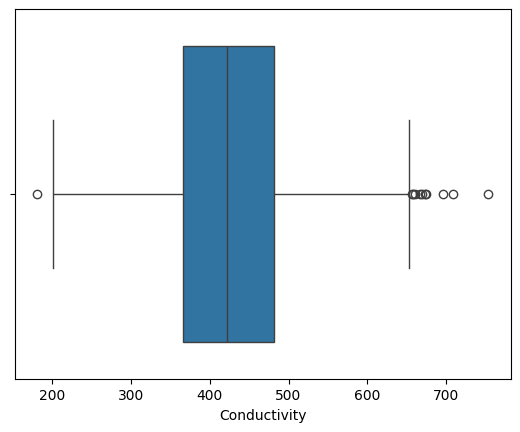

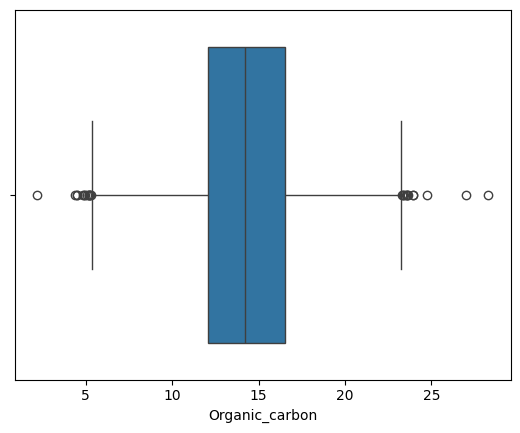

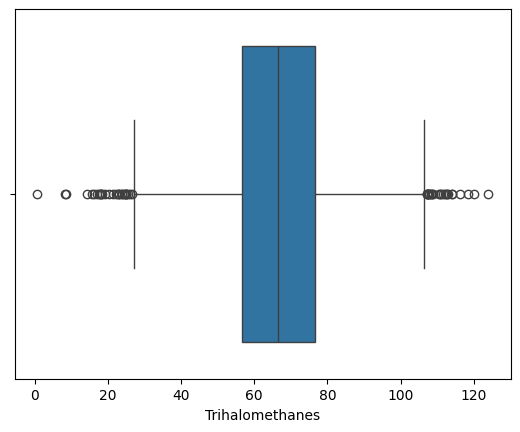

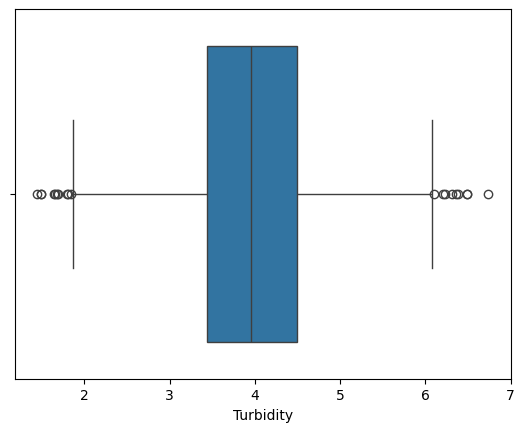

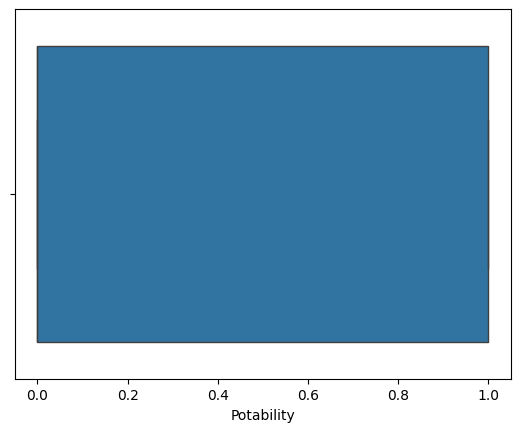

In [25]:
for col in data.columns:
    sns.boxplot(data, x=col)
    plt.show()

<Axes: xlabel='Potability'>

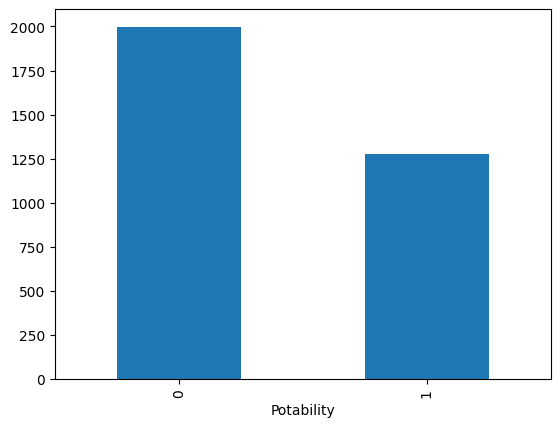

In [26]:
###sns.countplot(data['Potability'])
data['Potability'].value_counts().plot(kind='bar')

### Data Preprocessing

In [27]:
x=data.drop('Potability',axis=1)
y=data['Potability']

In [28]:
x.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [29]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

### Feature scalling:

In [30]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [31]:
x_scaled= std_scaler.fit_transform(x)
x_scaled

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

### training and testing dataset:

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [33]:
x_train.shape,x_test.shape

((2620, 9), (656, 9))

### MODEL DEVELOPMENT:

## list of model
  #1.logisticregression
  #2.decisiontreeclassifier
  #3.randomforestclassifier
  #4.extratreeclassifier
  #5.supportvectorclassifier
  #6.kneighborsclassifier
  #7.gradienboostingclassifier
  #8.naive-bayes
  #9.adaboostclassifier


### importing models

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

### Creating the object of the model:

In [35]:
LR=LogisticRegression()
DT=DecisionTreeClassifier()
RF=RandomForestClassifier()
ETC=ExtraTreesClassifier()
SVM=SVC()
KNN=KNeighborsClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()
NB=GaussianNB()

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
models=[LR,DT,RF,ETC,SVM,KNN,GBC,ABC,NB]
features=x_scaled
labels=y
cv=5
accu_list=[] #accuracy list
ModelName=[] #Model Name list
for model in models:
    model_name = model.__class__.__name__  # Get the model name
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=cv)
    accu_list.append(accuracies.mean() * 100)
    ModelName.append(model_name)

model_acc_df= pd.DataFrame({"model": ModelName,"Cross_val_Accuracy": accu_list})
model_acc_df

,model,Cross_val_Accuracy
0,LogisticRegression,61.019549
1,DecisionTreeClassifier,57.632005
2,RandomForestClassifier,63.492972
3,ExtraTreesClassifier,64.561022
4,SVC,65.080339
5,KNeighborsClassifier,59.340579
6,GradientBoostingClassifier,61.569866
7,AdaBoostClassifier,59.249488
8,GaussianNB,61.263871


In [38]:
from sklearn.metrics import classification_report

In [39]:
SVM.fit(x_train,y_train)
ETC.fit(x_train,y_train)
RF.fit(x_train,y_train)
Y_pred_rf=RF.predict(x_test)
y_pred_svm= SVM.predict(x_test)
y_pred_etc=ETC.predict(x_test)

In [40]:
print(classification_report(y_test,Y_pred_rf))

              precision    recall  f1-score   support

           0       0.67      0.89      0.76       400
           1       0.63      0.31      0.41       256

    accuracy                           0.66       656
   macro avg       0.65      0.60      0.59       656
weighted avg       0.65      0.66      0.63       656



In [41]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       400
           1       0.00      0.00      0.00       256

    accuracy                           0.61       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.37      0.61      0.46       656



In [42]:
print(classification_report(y_test,y_pred_etc))

              precision    recall  f1-score   support

           0       0.67      0.92      0.77       400
           1       0.70      0.29      0.40       256

    accuracy                           0.67       656
   macro avg       0.68      0.60      0.59       656
weighted avg       0.68      0.67      0.63       656



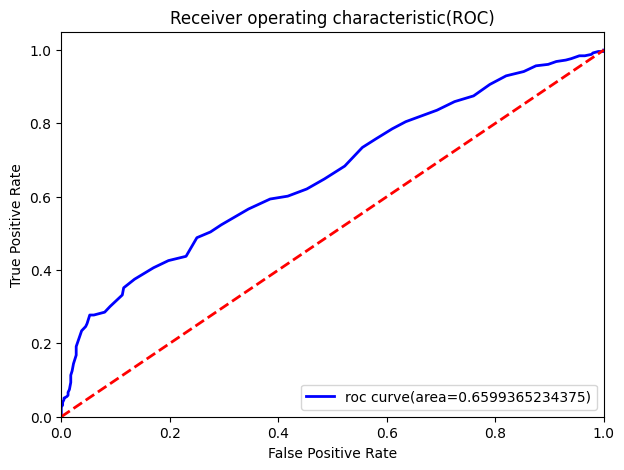

In [43]:
from sklearn.metrics import roc_curve,auc
y_scores=ETC.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_scores)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr,tpr,color='blue',lw=2,label=f'roc curve(area={roc_auc})')
plt.plot([0,1],[0,1],color='red',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(ROC)')
plt.legend(loc="lower right")
plt.show()

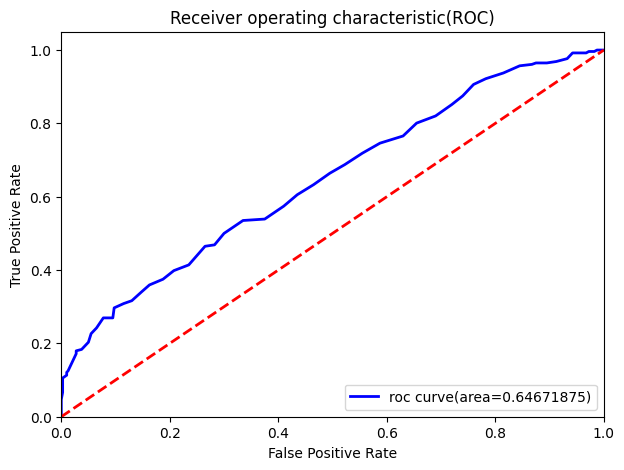

In [44]:
from sklearn.metrics import roc_curve,auc
y_scores=RF.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_scores)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr,tpr,color='blue',lw=2,label=f'roc curve(area={roc_auc})')
plt.plot([0,1],[0,1],color='red',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(ROC)')
plt.legend(loc="lower right")
plt.show()

### Best Model-random Forest:

In [45]:
from sklearn.model_selection  import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

params_RF = {"min_samples_split":[2,6],
             "min_samples_leaf":[1,4],
             "n_estimators":[100,200,300],
             "criterion":["gini",'entropy']}
cv_method = StratifiedKFold(n_splits=3)
GridSearchCV_RF= GridSearchCV(estimator=RandomForestClassifier(),
                              param_grid=params_RF,
                              cv=cv_method,
                              verbose=1,
                              n_jobs=2,
                              scoring="accuracy",
                              return_train_score=True
                             )
GridSearchCV_RF.fit(x_train,y_train)
best_params_RF = GridSearchCV_RF.best_params_
print("Best Hyperparameters for Random Forest are =",best_params_RF)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Hyperparameters for Random Forest are = {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 300}


In [46]:
best_estimator = GridSearchCV_RF.best_estimator_
best_estimator

RandomForestClassifier(min_samples_split=6, n_estimators=300)

In [47]:
best_estimator = GridSearchCV_RF.best_estimator_
best_estimator.fit(x_train,y_train)
y_pred_best = best_estimator.predict(x_test)
print(classification_report(y_test,y_pred_best))

              precision    recall  f1-score   support

           0       0.67      0.89      0.76       400
           1       0.64      0.30      0.41       256

    accuracy                           0.66       656
   macro avg       0.65      0.60      0.59       656
weighted avg       0.66      0.66      0.63       656



In [48]:
from sklearn.metrics import accuracy_score
print(f"Accuracy of Random Forest Model={round(accuracy_score(y_test,y_pred_best)*100,2)}%")

Accuracy of Random Forest Model=66.16%


### Predictive system:

In [49]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [50]:
list1= data.iloc[2:3,0:9].values.flatten().tolist()
list1

[8.099124189298397,
 224.23625939355776,
 19909.541732292397,
 9.275883602694089,
 333.7757766108135,
 418.6062130644815,
 16.868636929550973,
 66.42009251176368,
 3.0559337496641685]

In [51]:
ph = float(input("enter the ph value ="))
Hardness = float(input("enter the Hardness value ="))
Solids = float(input("enter the Solids value ="))
Chloramines = float(input("enter the Chloramines value ="))
Sulfate = float(input("enter the Sulfate value ="))
Conductivity = float(input("enter the Conductivity value ="))
Organic_carbon = float(input("enter the Organic_carbon value ="))
Trihalomethanes = float(input("enter the Trihalomethanes value ="))
Turbidity = float(input("enter the Turbidity value ="))

enter the ph value = 8.1
enter the Hardness value = 224.5
enter the Solids value = 19000
enter the Chloramines value = 9.5
enter the Sulfate value = 335
enter the Conductivity value = 420
enter the Organic_carbon value = 17
enter the Trihalomethanes value = 66.5
enter the Turbidity value = 3.5


In [52]:
input_data= [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity,
       Organic_carbon, Trihalomethanes, Turbidity]

In [53]:
water_data_input = std_scaler.transform([[ph, Hardness, Solids, Chloramines, Sulfate, Conductivity,
       Organic_carbon, Trihalomethanes, Turbidity]])
water_data_input

array([[ 0.69346369,  0.85568742, -0.34379065,  1.50218488,  0.03387719,
        -0.07678478,  0.8208317 ,  0.00657728, -0.59824187]])

In [54]:
model_prediction = best_estimator.predict(water_data_input)
model_prediction

array([1], dtype=int64)

In [55]:
if model_prediction[0]==0:
    print("water is not safe foe consumption")
else:
    print("water is safe for consumption")

water is safe for consumption


In [63]:
def Water_Quality_Prediction(input_data):
    scaled_data = std_scaler.transform([input_data])
    model_prediction = best_estimator.predict(scaled_data)
    if model_prediction[0]==0:
        return"Water is 'not safe' for consumption"
    else:
        return "Water is 'safe' for consumption"

In [64]:
ph = float(input("enter the ph value ="))
Hardness = float(input("enter the Hardness value ="))
Solids = float(input("enter the Solids value ="))
Chloramines = float(input("enter the Chloramines value ="))
Sulfate = float(input("enter the Sulfate value ="))
Conductivity = float(input("enter the Conductivity value ="))
Organic_carbon = float(input("enter the Organic_carbon value ="))
Trihalomethanes = float(input("enter the Trihalomethanes value ="))
Turbidity = float(input("enter the Turbidity value ="))

input_data= [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity,
       Organic_carbon, Trihalomethanes, Turbidity]

Water_Quality_Prediction(input_data)

enter the ph value = 7.654
enter the Hardness value = 240
enter the Solids value = 14245
enter the Chloramines value = 6.28
enter the Sulfate value = 373
enter the Conductivity value = 416
enter the Organic_carbon value = 10.46
enter the Trihalomethanes value = 85.85
enter the Turbidity value = 2.43


"Water is 'safe' for consumption"

### save trained model:

In [65]:
import pickle

In [66]:
filename='Water_Quality_ML_Trained_Model.sav'
pickle.dump(best_estimator,open(filename,'wb'))